# <font color = 'color'>블록 딥러닝: 4장_핸드라이팅 도형이미지 분류예측</font>

# <font color = 'blue'>문제 정의</font>

### 직접 손으로 그린 도형이미지 데이터셋(Handwriting Shape Dataset)
* 분류(classification) 문제
* 손으로 드로잉해 만든 도형이미지 색상농도 특성을 통해 도형이미지를 분류예측하는 문제상황
* 총 60개: 훈련용(45개), 테스트용(15개)

<img src = './../../images/handwriting_shape.png'>

1. 피처(입력/예측/독립)변수
    * 드로잉 도형이미지 픽셀특성(가로24 X 세로24 픽셀별 색상농도) <pre>
1. 타깃(출력/반응/종속)변수
    * 3개의 도형이미지 범주(0: circle, 1: rectangle, 2: triangle)

# <font color = 'blue'>데이터 준비</font>

### 시각화 모듈로딩 및 한글폰트 작업

In [1]:
# 시각화 작업을 위한 모듈 로딩작업
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

In [2]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_name = font_manager.FontProperties(fname = "./fonts/malgun.ttf").get_name()
print(font_name)

# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

Malgun Gothic


### 기본 라이브러리 로딩

In [3]:
# 기본 라이브러리 로딩
import numpy as np
import pandas as pd
import os

# 워닝메시지 출력관련 모듈로딩
import warnings

warnings.filterwarnings(action = 'ignore') 
# - 출력되는 경고메시지를 무시하고 숨김

# warnings.filterwarnings(action = 'default')
# - 다시 경고메시지가 나타나도록 함

### 이미지 파일 소싱

In [4]:
# 웹브라우저 라이브러리 이용해 해당 데이터셋 위치 확인
# import webbrowser
# webbrowser.open('https://tykimos.github.io/Keras/warehouse/2017-3-8_CNN_Getting_Started_handwriting_shape.zip')

# - 다운받은 zip파일의 압축을 풀어 주피터노트북 작업경로내 ./datapic/handwriting_shape 라는 폴더에 저장해 놓음

### 이미지 파일 저장폴더 확인

In [5]:
# 현재 작업경로 확인
import os
os.getcwd()

'C:\\my\\OneDrive\\mcpy\\modu'

In [ ]:
# 현재 작업경로내 파일&폴더 목록 확인
os.listdir()

In [7]:
# 현재 작업경로내 폴더목록만 확인
import glob
for i in glob.glob('*'):
    if os.path.isdir(i):
        print(i)

# 축약형으로 구현
[i for i in glob.glob('*') if os.path.isdir(i)]

datapic
dataset
deep_class
deep_code
fonts
graph
images
kagglecatsanddogs_3367a
keras-dataset-reuters-newswire-topics
logs
mnistasjpg
model
Untitled Folder
두견
찌르레기


['datapic',
 'dataset',
 'deep_class',
 'deep_code',
 'fonts',
 'graph',
 'images',
 'kagglecatsanddogs_3367a',
 'keras-dataset-reuters-newswire-topics',
 'logs',
 'mnistasjpg',
 'model',
 'Untitled Folder',
 '두견',
 '찌르레기']

In [8]:
# 현재 작업경로내 파일목록만 확인
for i in glob.glob('*'):
    if os.path.isfile(i):
        print(i)
        
# 축약형으로 구현
[i for i in glob.glob('*') if os.path.isfile(i)]

006958-master.zip
00_Q리스트.ipynb
01_선형회귀_최소제곱법_모두의 딥러닝_3장(p.42).ipynb
01_환경설정.ipynb
02_기초딥.ipynb
02_선형회귀_경사하강법_모두의 딥러닝_4장(p.63).ipynb
03_로지스틱회귀_모두의 딥러닝_5장(p.79).ipynb
04_단층다층퍼셉트론_오차역전파_심층신경망_모두의 딥러닝_6장-9장.ipynb
05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p.122)_11장(p.130).ipynb
05_이진분류_피마당뇨병 데이터셋_텐서보드.ipynb
06_다중분류_아이리스 데이터셋_모두의 딥러닝_12장(p.146).ipynb
07_데이터분할 과적합방지_소나신호 광물탐지 데이터셋_모두의 딥러닝_13장(p.155).ipynb
07_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p-Copy1.155).ipynb
07_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p.155).ipynb
08_베스트모델만들기_와인품질 데이터셋_모두의 딥러닝_14장(p.174).ipynb
09_수치예측_도요타 중고차 가격예측_모두의 딥러닝_15장(p-Copy1.196).ipynb
09_수치예측_보스턴 주택가격 데이터셋_모두의 딥러닝_15장(p.196).ipynb
10_이미지 분류예측_CNN컨볼루션신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p-Copy1.220).ipynb
10_이미지 분류예측_CNN컨볼루션신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p.220).ipynb
10_이미지 분류예측_DNN심층신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p-Copy1.204).ipynb
10_이미지 분류예측_DNN심층신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p.204).ipynb
11_텍스트 분류예측_DNN심층신경망이용_로이터 뉴스 주제분류_모두의 딥러닝_17장(p.234).ipynb
11_텍스트 분류예측_RNN순환신경망이용_

['006958-master.zip',
 '00_Q리스트.ipynb',
 '01_선형회귀_최소제곱법_모두의 딥러닝_3장(p.42).ipynb',
 '01_환경설정.ipynb',
 '02_기초딥.ipynb',
 '02_선형회귀_경사하강법_모두의 딥러닝_4장(p.63).ipynb',
 '03_로지스틱회귀_모두의 딥러닝_5장(p.79).ipynb',
 '04_단층다층퍼셉트론_오차역전파_심층신경망_모두의 딥러닝_6장-9장.ipynb',
 '05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p.122)_11장(p.130).ipynb',
 '05_이진분류_피마당뇨병 데이터셋_텐서보드.ipynb',
 '06_다중분류_아이리스 데이터셋_모두의 딥러닝_12장(p.146).ipynb',
 '07_데이터분할 과적합방지_소나신호 광물탐지 데이터셋_모두의 딥러닝_13장(p.155).ipynb',
 '07_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p-Copy1.155).ipynb',
 '07_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p.155).ipynb',
 '08_베스트모델만들기_와인품질 데이터셋_모두의 딥러닝_14장(p.174).ipynb',
 '09_수치예측_도요타 중고차 가격예측_모두의 딥러닝_15장(p-Copy1.196).ipynb',
 '09_수치예측_보스턴 주택가격 데이터셋_모두의 딥러닝_15장(p.196).ipynb',
 '10_이미지 분류예측_CNN컨볼루션신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p-Copy1.220).ipynb',
 '10_이미지 분류예측_CNN컨볼루션신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p.220).ipynb',
 '10_이미지 분류예측_DNN심층신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p-Copy1.204).ipynb',
 '10_이미지 분류예측_DNN심층신경망이용_MNIST 손글씨 숫자이미지_모두의 딥러닝_16장(p.204).ipynb',

In [9]:
# 현재 작업경로내 분석대상 이미지파일 저장폴더 확인
os.listdir(path = './datapic/handwriting_shape')

['test', 'train']

In [10]:
import os
 
rootDir = './datapic/handwriting_shape'
for dirName, subdirList, fileList in os.walk(rootDir):
    print('Folder: %s' % dirName)
    for fname in fileList:
        print('\t%s' % fname)


Folder: ./datapic/handwriting_shape
Folder: ./datapic/handwriting_shape\test
Folder: ./datapic/handwriting_shape\test\circle
	circle016.png
	circle017.png
	circle018.png
	circle019.png
	circle020.png
Folder: ./datapic/handwriting_shape\test\rectangle
	rectangle016.png
	rectangle017.png
	rectangle018.png
	rectangle019.png
	rectangle020.png
Folder: ./datapic/handwriting_shape\test\triangle
	triangle016.png
	triangle017.png
	triangle018.png
	triangle019.png
	triangle020.png
Folder: ./datapic/handwriting_shape\train
Folder: ./datapic/handwriting_shape\train\circle
	circle001.png
	circle002.png
	circle003.png
	circle004.png
	circle005.png
	circle006.png
	circle007.png
	circle008.png
	circle009.png
	circle010.png
	circle011.png
	circle012.png
	circle013.png
	circle014.png
	circle015.png
Folder: ./datapic/handwriting_shape\train\rectangle
	rectangle001.png
	rectangle002.png
	rectangle003.png
	rectangle004.png
	rectangle005.png
	rectangle006.png
	rectangle007.png
	rectangle008.png
	rectangle00

### 이미지 파일 데이터셋 만들기

In [11]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 10

import numpy as np
np.random.seed(myseed)

In [12]:
# 이미지파일 데이터셋 제네레이션 모듈 준비
from keras.preprocessing.image import ImageDataGenerator
# 이미지파일은 데이터 셋으로 변환해주는 모듈 ImageDataGenerator

# 이미지파일 데이터셋 제네레이션 모듈 인스턴스 객체화
imgen = ImageDataGenerator(rescale = 1./255) # 픽셀 농도를 미리 스케일링 함

# - 하드디스크에 저장된 물리적인 이미지파일을 분석용 수치데이터셋으로 
#   변환/생성(제네레이션) 하는 기능을 별도의 객체로 만들어 냄

# - rescale = 1./255 옵션사용으로 딥러닝 연산에 적합한 스케일링 미리 실시해 로딩하는 것도 좋음
#             사용하지 않으면, 원본이미지의 픽셀별 색상농도 0~255 수치가 그대로 로딩되며, 
#             별도로 스케일링 전처리를 해주면 됨

Using TensorFlow backend.


In [13]:
# 이미지파일 데이터셋 생성객체 이용

# 훈련데이터셋 생성하기(제네레이션)
trainset = imgen.flow_from_directory(
    directory = './datapic/handwriting_shape/train', 
    color_mode = 'grayscale', # 흑백으로 읽겠다. (컬러모드도 존재)
    target_size = (24, 24),  # 이미지를 통일된 규격으로 맞춰줌 -> 동일한 조건으로 훈련시키기 위함
    batch_size = 3, 
    class_mode = 'categorical')

testset = imgen.flow_from_directory(
    directory = './datapic/handwriting_shape/test', 
    color_mode = 'grayscale',
    target_size = (24, 24), 
    batch_size = 3, 
    class_mode = 'categorical')

# - directory: 해당 디렉토리 내에 분류예측대상 이미지파일을 레이블별로 폴더를 만들어서 저장해 놓아야 함
# - color_mode: 흑백이미지(grayscale), 컬러이미지(rgb)
# - target_size: 저장되어 있는 이미지 파일 로딩시 통일된 픽셀규격(가로, 세로)으로 로딩해줌
# - batch_size: 이미지파일을 메모리로 로딩시 몇 개씩 나누어서 처리할 것인지 설정
#               batsh_size = 3이므로 훈련용 이미지 45개 / 3배치 = 15개 epochs로 로딩됨
#               batsh_size = 3이므로 테스트용 이미지 15갸 / 3배치 = 5개 epochs로 로딩됨
# - class_mode: 분류예측용 레이블 숫자 생성
#               binary:이항분류, categorical:다항분류, sparse:1차원 정수 

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


# <font color = 'blue'>데이터 기본탐색</font>

### 훈련용 이미지파일 데이터셋

#### 이미지파일 로딩환경

In [14]:
print('이미지파일 로딩 경로:', trainset.directory)
print('이미지파일 로딩 갯수:', trainset.n)
print('이미지파일 로딩 갯수:', trainset.samples)
print('이미지파일 로딩 배치(batch) 크기:', trainset.batch_size)
print('이미지파일 로딩 에포크(epochs) 크기:', len(trainset))

이미지파일 로딩 경로: ./datapic/handwriting_shape/train
이미지파일 로딩 갯수: 45
이미지파일 로딩 갯수: 45
이미지파일 로딩 배치(batch) 크기: 3
이미지파일 로딩 에포크(epochs) 크기: 15


In [15]:
# 이미지파일 로딩경로와 파일명
trainset.filenames

['circle\\circle001.png',
 'circle\\circle002.png',
 'circle\\circle003.png',
 'circle\\circle004.png',
 'circle\\circle005.png',
 'circle\\circle006.png',
 'circle\\circle007.png',
 'circle\\circle008.png',
 'circle\\circle009.png',
 'circle\\circle010.png',
 'circle\\circle011.png',
 'circle\\circle012.png',
 'circle\\circle013.png',
 'circle\\circle014.png',
 'circle\\circle015.png',
 'rectangle\\rectangle001.png',
 'rectangle\\rectangle002.png',
 'rectangle\\rectangle003.png',
 'rectangle\\rectangle004.png',
 'rectangle\\rectangle005.png',
 'rectangle\\rectangle006.png',
 'rectangle\\rectangle007.png',
 'rectangle\\rectangle008.png',
 'rectangle\\rectangle009.png',
 'rectangle\\rectangle010.png',
 'rectangle\\rectangle011.png',
 'rectangle\\rectangle012.png',
 'rectangle\\rectangle013.png',
 'rectangle\\rectangle014.png',
 'rectangle\\rectangle015.png',
 'triangle\\triangle001.png',
 'triangle\\triangle002.png',
 'triangle\\triangle003.png',
 'triangle\\triangle004.png',
 'triangle

#### 이미지파일 특성규격

In [16]:
print('이미지파일 색상채널 유형:', trainset.color_mode)
# - color_mode 옵션사용시 흑백:gryscale, 컬러:rgb

print('이미지파일 데이터 저장특성:', trainset.data_format)
# - channels_last: (가로픽셀수, 세로픽셀수, 색상채널)
# - channel_first: (색상채녈, 가로픽셀수, 세로픽셀수)

print('이미지파일 로딩규격:', trainset.target_size)

print('이미지파일 특성규격:', trainset.image_shape)
# - 가로픽셀수, 세로픽셀수, 색상유형

print('이미지파일 데이터 타입:', trainset.dtype)
# - 이미지마다의 각 픽셀별 색상농도수치가 실수형32비트로 로딩됨
# - 앞에서 imgen = ImageDataGenerator(rescale = 1./255)로 리스케일을 해줘서 1./ 때문에 Float형태가 됨

print('이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법:', trainset.interpolation)
# - nearest: 부드럽게 처리, none: 일반 직선모양

이미지파일 색상채널 유형: grayscale
이미지파일 데이터 저장특성: channels_last
이미지파일 로딩규격: (24, 24)
이미지파일 특성규격: (24, 24, 1)
이미지파일 데이터 타입: float32
이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법: nearest


#### 이미지파일 클래스 레이블

In [17]:
print('이미지파일 클래스 유형:', trainset.class_mode)
# - binary:이항분류, categorical:다항분류, sparse:1차원 정수

print('이미지파일 클래스 유형개수:', trainset.num_classes)

print('\n이미지파일 클래스별 레이블과 번호:\n', trainset.class_indices)
# - 하드디스크에 저장되어 있는 폴더명&순서를 그대로 가져와서 사용함

print('\n이미지파일 마다 부여된 클래스 번호:\n', trainset.classes)

이미지파일 클래스 유형: categorical
이미지파일 클래스 유형개수: 3

이미지파일 클래스별 레이블과 번호:
 {'circle': 0, 'rectangle': 1, 'triangle': 2}

이미지파일 마다 부여된 클래스 번호:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


### 테스트용 이미지파일 데이터셋

#### 이미지파일 로딩환경

In [18]:
print('이미지파일 로딩 경로:', testset.directory)
print('이미지파일 로딩 갯수:', testset.n)
print('이미지파일 로딩 갯수:', testset.samples)
print('이미지파일 로딩 배치(batch) 크기:', testset.batch_size)
print('이미지파일 로딩 에포크(epochs) 크기:', len(testset))

이미지파일 로딩 경로: ./datapic/handwriting_shape/test
이미지파일 로딩 갯수: 15
이미지파일 로딩 갯수: 15
이미지파일 로딩 배치(batch) 크기: 3
이미지파일 로딩 에포크(epochs) 크기: 5


In [19]:
# 이미지파일 로딩경로와 파일명
testset.filenames

['circle\\circle016.png',
 'circle\\circle017.png',
 'circle\\circle018.png',
 'circle\\circle019.png',
 'circle\\circle020.png',
 'rectangle\\rectangle016.png',
 'rectangle\\rectangle017.png',
 'rectangle\\rectangle018.png',
 'rectangle\\rectangle019.png',
 'rectangle\\rectangle020.png',
 'triangle\\triangle016.png',
 'triangle\\triangle017.png',
 'triangle\\triangle018.png',
 'triangle\\triangle019.png',
 'triangle\\triangle020.png']

#### 이미지파일 특성규격

In [20]:
print('이미지파일 색상채널 유형:', testset.color_mode)
# - color_mode 옵션사용시 흑백:gryscale, 컬러:rgb

print('이미지파일 데이터 저장특성:', testset.data_format)
# - channels_last: (가로픽셀수, 세로픽셀수, 색상채널)
# - channel_first: (색상채녈, 가로픽셀수, 세로픽셀수)

print('이미지파일 로딩규격:', testset.target_size)

print('이미지파일 특성규격:', testset.image_shape)
# - 가로픽셀수, 세로픽셀수, 색상유형

print('이미지파일 데이터 타입:', testset.dtype)
# - 이미지마다의 각 픽셀별 색상농도수치가 실수형32비트로 로딩됨
# - 앞에서 imgen = ImageDataGenerator(rescale = 1./255)로 리스케일을 해줘서 1./ 때문에 Float형태가 됨

print('이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법:', testset.interpolation)
# - nearest: 부드럽게 처리, none: 일반 직선모양

이미지파일 색상채널 유형: grayscale
이미지파일 데이터 저장특성: channels_last
이미지파일 로딩규격: (24, 24)
이미지파일 특성규격: (24, 24, 1)
이미지파일 데이터 타입: float32
이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법: nearest


#### 이미지파일 클래스 레이블

In [21]:
print('이미지파일 클래스 유형:', testset.class_mode)
# - binary:이항분류, categorical:다항분류, sparse:1차원 정수

print('이미지파일 클래스 유형개수:', testset.num_classes)

print('\n이미지파일 클레스별 레이블과 번호:\n', testset.class_indices)
# - 하드디스크에 저장되어 있는 폴더명&순서를 그대로 가져와서 사용함

print('\n이미지파일 마다 부여된 클래스 번호:\n', testset.classes)

이미지파일 클래스 유형: categorical
이미지파일 클래스 유형개수: 3

이미지파일 클레스별 레이블과 번호:
 {'circle': 0, 'rectangle': 1, 'triangle': 2}

이미지파일 마다 부여된 클래스 번호:
 [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


# <font color = 'blue'>데이터 내용탐색</font>

### 로딩한 이미지파일 기본탐색

In [22]:
print(f'훈련용 이미지데이터셋 객체유형:, {type(trainset)}')
print(f'훈련용 이미지데이터셋 객체길이: {len(trainset)}개 에포크')
print(f'1개 에포크당 훈련용 이미지파일: {trainset.batch_size}개씩 미니배치로 로딩됨')
print(f'분석대상 훈련용 이미지데이터셋: {trainset.n}개 이미지의 가로세로 픽셀별 색상농도특성')

훈련용 이미지데이터셋 객체유형:, <class 'keras_preprocessing.image.DirectoryIterator'>
훈련용 이미지데이터셋 객체길이: 15개 에포크
1개 에포크당 훈련용 이미지파일: 3개씩 미니배치로 로딩됨
분석대상 훈련용 이미지데이터셋: 45개 이미지의 가로세로 픽셀별 색상농도특성


In [23]:
print(f'0번 에포크 객체유형: {type(trainset[0])}')
print(f'0번 에포크 객체길이: {len(trainset[0])}')

0번 에포크 객체유형: <class 'tuple'>
0번 에포크 객체길이: 2


In [24]:
print('0번 에포크 내용:\n', trainset[0])

# - 첫번째 요소: 0번째 에포크에 미니배치로 로딩된 3개 이미지의 가로세로 픽셀별 색상농도 데이터
# - 두번째 요소: 0번째 에포크에 미니배치로 로딩된 3개 이미지의 클래스 레이블 숫자인덱스
#                rectangle, rectangle, circle로 나타남

0번 에포크 내용:
 (array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

   

In [25]:
print(f'0번 에포크의 0번 요소 객체유형: {type(trainset[0][0])}')
print(f'0번 에포크의 0번 요소 객체길이: {len(trainset[0][0])}')

0번 에포크의 0번 요소 객체유형: <class 'numpy.ndarray'>
0번 에포크의 0번 요소 객체길이: 3


In [26]:
print('0번 에포크의 0번 요소 내용:\n', trainset[0][0])
# - 0번째 에포크에 미니배치로 로딩된 3개 이미지의 가로세로 픽셀별 색상농도 데이터

0번 에포크의 0번 요소 내용:
 [[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1

In [27]:
print(f'0번 에포크의 1번 요소 객체유형: {type(trainset[0][1])}')
print(f'0번 에포크의 1번 요소 객체길이: {len(trainset[0][1])}')

0번 에포크의 1번 요소 객체유형: <class 'numpy.ndarray'>
0번 에포크의 1번 요소 객체길이: 3


In [28]:
print('0번째 에포크의 1번 요소 내용:\n', trainset[0][1])
# - 0번째 에포크에 미니배치로 로딩된 3개 이미지의 
#   클래스 레이블 숫자인덱스는 rectangle, rectangle, circle로 나타남

0번째 에포크의 1번 요소 내용:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


차례로  <br> 
삼각형 <br>
원 <br>
사각형

In [29]:
print(f'0번 에포크 0번 요소에 있는 3개 이미지 중 0번 이미지 객체유형: {type(trainset[0][0][0])}')
print(f'0번 에포크 0번 요소에 있는 3개 이미지 중 0번 이미지 객체길이: {len(trainset[0][0][0])}')

0번 에포크 0번 요소에 있는 3개 이미지 중 0번 이미지 객체유형: <class 'numpy.ndarray'>
0번 에포크 0번 요소에 있는 3개 이미지 중 0번 이미지 객체길이: 24


In [30]:
print(f'0번 에포크 0번 요소에 있는 3개 이미지 중 0번 이미지 내용: {trainset[0][0][0]}')
# - 0번째 에포크에 미니배치로 로딩된 3개 이미지 중 첫번째 이미지의 가로세로 픽셀별 색상농도 데이터

0번 에포크 0번 요소에 있는 3개 이미지 중 0번 이미지 내용: [[[1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]

In [31]:
print('0번 에포크 0번 요소에 있는 3개 이미지 중 0번 이미지 내용: 24X24 규격') 
trainset[0][0][0].reshape(24, 24)

# - 0번째 에포크에 미니배치로 로딩된 3개 이미지 중 
#   첫번째 이미지의 가로세로 픽셀별 색상농도 데이터
# - 이미지로딩시 설정한 24X24 규격으로 재구조화해 출력함

0번 에포크 0번 요소에 있는 3개 이미지 중 0번 이미지 내용: 24X24 규격


array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.   

In [32]:
# 이미지데이터를 가로28 X 세로28 = 768픽셀 구조형식으로 출력하기

for x in trainset[0][0][0].reshape(24, 24).astype(int): # 전체내용 중 1개 행씩 로딩,출력자리수 때문에 정수로 만듬
    for i in x:      # 1개 행에 속한 세부 열 요소를 하나씩 로딩
        print('{:4} '.format(i), end = '') # 해당 픽셀의 밝기정도 수치를 출력
    print() # 1개 행 출력을 마치면 출력위치를 다음 행으로 이동

   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
   1    1    1    1    1    1    1    1    1    1    0    0    1    1    1    1    1    1    1    1    1    1    1    1 
   1    1    1    1    1    1    1    1    1    1    0    0    0    1    1    1    1    1    1    1    1    1    1    1 
   1    1    1    1    1    1    1    1    1    0    0    0    0    1    1    1    1    1    1    1    1    1    1    1 
   1    1    1    1    1    1    1    1    1    0    0    0    0    0    1    1    1    1    1    1    1    1    1    1 
   1    1    1    1    1    1    1    1    0    0    0    0    0    0    0    1    1    1    1    1    1    1    1    1 
   1    1    1    1    1    1   

Text(0.5, 1.0, '숫자이미지의 픽셀분포 히스토그램')

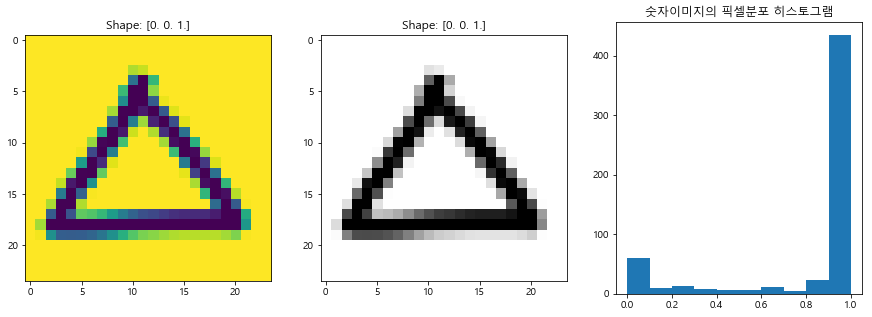

In [33]:
# 이미지데이터 재구조화
img = trainset[0][0][0].reshape(24, 24)
# - 가로24 X 세로24 = 총 576개 픽셀로 구성된 이미지파일을
#   각 픽셀별 밝기정도를 나타내는 수치로 인식함

# 이미지 데이터 픽셀정보 분포파악
fig = plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.imshow(trainset[0][0][0].reshape(24, 24))
plt.title(f'Shape: {trainset[0][1][0]}')

plt.subplot(1, 3, 2)
plt.imshow(trainset[0][0][0].reshape(24, 24), cmap = 'gray', interpolation = 'none')
plt.title(f'Shape: {trainset[0][1][0]}')

plt.subplot(1, 3, 3)
plt.hist(trainset[0][0][0].reshape(576))
plt.title("숫자이미지의 픽셀분포 히스토그램")

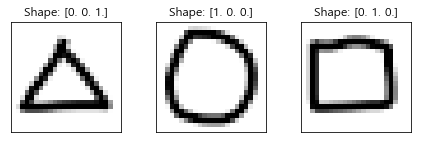

In [34]:
# 훈련셋 중 여러 개 숫자이미지 그래픽출력
fig = plt.figure()

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    plt.imshow(trainset[0][0][i].reshape(24, 24), cmap='gray', interpolation = 'none')
    plt.title(f'Shape: {trainset[0][1][i]}')
    plt.xticks([])
    plt.yticks([])

# <font color = 'blue'>딥러닝 모델링</font>

### 딥러닝 라이브러리 로딩

In [35]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# - Dense: 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌
# - Dropout: 은닉층에 배치된 노두 중 일부를 임의로 비활성화 시킴
# - Flatten: 컨볼루션층이나 맥스풀링의 2차원(가로X세로) 배열을 1차원으로 바꾸어 주는 기능
# - Conv2D: 분석대상 이미지의 세부영역별 특징을 마스크 필터를 적용해 추출하는 기능
# - MaxPooling2D: 분석대상 이미지의 세부영역별 대표특징값을 추출하는 기능

#### 더깊은 딥러닝
* 이미지데이터를 구성하는 픽셀 하나하나를 일일이 비교분석 하는 것이 아니라 
<br>컨볼루션신경망과 맥스풀링을 통해 이미지데이터의 세부영역별 주요/대표 특징값 추출해 딥러닝 작업의 예측력을 높일 수 있음
<img src = './../../images/cnn_max.png'>

#### 컨볼루션신경망(CNN: Convolution Neural Net)
* 임의의 가중치 수치와 행렬차원을 가진 마스크 필터를 만들고, 
<br>이를 분석대상 이미지 데이터의 영역별로 적용(가중치를 곱해서 합함)하면 세부영역별 이미지의 주요특징을 파악할 수 있음
<img src = './../../images/cnn.png'>

* 가중치와 행렬차원이 다른 여러 개의 마스크 필터를 만들어 분석대상 이미지 데이터 영역별로 적용하게 되면, 
<br>세부 영역별 이미지 특징을 다양한 가중치로 파악한 컨볼루션(합성곱) 계층이 만들어지는 것임
* 입력된 이미지 데이터를 전체적으로 한 번에 비교하는 것이 아니라 
<br>컨볼루션(합성곱) 계층을 통해서 세부영역별로 주요특징을 비교함으로 이미지에 대한 인식률을 높일 수 있음 
<img src = './../../images/cnnlayer.png'>

#### 맥스풀링(Max Pooling; sub-sampling)
* 분석대상 이미지를 세부영역으로 분할한 다음 각 영역의 대표특징값(max)만 추출해주는 기법 
* 이미지의 사소한 변화나 불필요한 정보를 간추려 이미지를 구별하는 주요 특징을 보다 명확하게 찾아주는 효과가 있음
<img src = './../../images/maxpooling.png'>

#### 드롭아웃(Dropout)
* 은닉층에 배치된 노두 중 일부를 임의로 비활성화 시킴
* 과적합을 방지하기 위해서 학습 시에 지정된 비율만큼 임의의 입력 뉴런(1차원)을 신경망 연산에서 제외킴
<img src = './../../images/dropout.png'>

#### 플래튼(Flatten)
* 2차원의 특징맵을 Dense계층으로 전달하기 위해서 1차원 형식으로 바꿔줌
* 컨볼루션층이나 맥스풀링의 2차원(가로X세로) 배열을 1차원으로 바꾸어 주는 기능

### 딥러닝 학습계층 설정

In [36]:
# 입력층-컨볼루션층-컨볼루션층-맥스풀링층--플래튼-은닉층-출력층
md = Sequential()

# 컨볼루션층: 입력이미지크기
md.add(Conv2D(32, kernel_size = (3, 3), input_shape = (24, 24, 1), activation = 'relu'))
md.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))

md.add(MaxPooling2D(pool_size = (2, 2)))

md.add(Flatten())

md.add(Dense(128, activation = 'relu'))
md.add(Dense(3, activation = 'softmax')) # circle이냐 triangle이냐 rectangle이냐를 구하는 거니까 '3'을 써줌

md.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 838,531
Trainable params: 838,531
Non-trainable params: 0
_________________________________________________________________


### 벡터이미지 형태로 신경망모델 설계내용 확인

In [37]:
# 의사결정나무 그림을 출력해주는 GraphViz라는 프로그램이 
# - Jupyter Notebook과 연동해서 작동되도록 아래사항 실시

# 관련 프로그램 다운/설치
# - http://www.graphviz.org/에 접속 Download 메뉴에서
#   윈도우용 graphviz-2.38.msi 설치버전 다운로드후 PC에 직접설치

# 설치된 프로그램 경로설정
# - 제어판 > 시스템 > (왼쪽상단) 고급시스템설정 > 
#   (아래쪽) 환경변수 > (아래쪽) 시스템변수 목록중 "Path" 클릭 >
#   변수값 영역에 들어 있는 일련의 경로설정내역 제일오른쪽에 아래 경로 추가
# ==> ;C:\Program Files (x86)\Graphviz2.38\bin

# (주의) 
# - 경로시작시 이전 경로설정내역과 별도로 연결하기 위해 세미콜론기호( ; )로 시작해야 함
# - 경로끝에 \bin을 붙여주어야 함

# 파이선에서 관련 패키지 설치
# - 아나콘다 프롬프트창이나 노트북파워셀 창에서 
#   pip install graphviz pydotplus 구문실행
# - 또는 conda install -c conda-forge graphviz pydotplus 구문실행

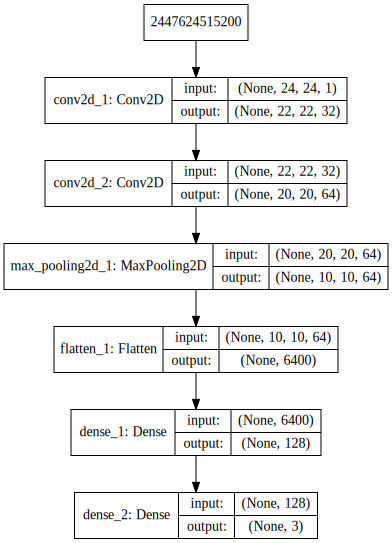

In [38]:
# 벡터이미지 형태로 신경망모델 설계내용 확인
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(md, show_shapes = True).create(prog = 'dot', format = 'svg'))

### 딥러닝 학습방법 설정

In [39]:
# 준비된 학습계층의 학습방법 설정
md.compile(loss = 'categorical_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])
# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

### 학습모델 파일저장 옵션 설정

In [40]:
# 딥러닝 학습모델 저장폴더명 설정
import os

md_dir = './model/'
if not os.path.exists(md_dir):
    os.mkdir(md_dir)
    
# 딥러닝 학습모델별 저장파일명 변경설정
md_path = './model/vloss{val_loss:.3f}_vacc{val_acc:.3f}_ep{epoch:d}.hdf5'
# - loss: 전체데이터 중 훈련셋(training) 학습오차
# - acc: 전체데이터 중 훈련셋(training) 정확도
# - val_loss: 전체데이터 중 검증셋(validation) 오차
# - val_acc: 전체데이터 중 검증셋(validation) 정확도

# ep{epoch:d} 단위배치(batch) 작업인 엑폭번호를 정수형으로 파일명 시작부분에 기록
# vloss{val_loss:.3f} 각 학습모델의 검증데이터 오차정도를 소수3자리까지 파일에 기록
# vacc{val_acc:.3f} 각 학습모델의 검증데이터 정확정도를 소수3째자리까지 파일에 기록

### 학습모델 체크포인트 옵션 설정

In [41]:
# 학습모델 체크포인트 모듈 로딩
from keras.callbacks import ModelCheckpoint

In [42]:
# 체크포인트(checkpoint) 변경설정
cp = ModelCheckpoint(filepath = md_path, 
                     monitor = 'val_loss', 
                     verbose = 1, 
                     save_best_only = True)
# - filepath: 각 학습모델별 성능평가 파일저장 경로
# - monitor 옵션: 각 학습모델별 성능평가 기준
#   * 전체데이터 중 훈련셋(training) 학습오차: loss
#   * 전체데이터 중 훈련셋(training) 정확도: acc
#   * 전체데이터 중 검증셋(validation) 오차: val_loss
#   * 전체데이터 중 검증셋(validation) 정확도: val_acc
#   * 전체데이터 중 시험셋(테스트; test)은 별도로 분할해 놓아야 함
# - verbose: 모델별 학습진행사항 출력
# - save_best_only: 각 학습모델별 성능평가 파일저장시
#                   이전 모델보다 성능이 좋아졌을 때만 저장하도록 함

### 학습모델 과적합 방지 옵션 설정

In [43]:
# 과적합 방지용 종료 메서드 로딩
from keras.callbacks import EarlyStopping

In [44]:
# 조기종료 옵션설정
es = EarlyStopping(monitor = 'val_loss', patience = 10)
# - monitor: 검증셋 대상 모니터할 값 설정
# - patience: 검증셋 오차가 좋아지지 않아도 몇 번까지 기다릴지 설정

### 딥러닝 모델에 데이터 피팅

In [45]:
# 딥러닝 모델 최적화 훈련진행
md_hist = md.fit_generator(
    trainset,  
    epochs = 50, 
    steps_per_epoch = 15, 
    validation_data = testset,
    validation_steps = 5,
    verbose = 1, 
    callbacks = [cp, es])

Epoch 1/50
15/15 [==============================] - 1s 47ms/step - loss: 1.0484 - acc: 0.4889 - val_loss: 0.6392 - val_acc: 0.9333

Epoch 00001: val_loss improved from inf to 0.63923, saving model to ./model/vloss0.639_vacc0.933_ep1.hdf5
Epoch 2/50
15/15 [==============================] - 0s 23ms/step - loss: 0.3475 - acc: 0.9333 - val_loss: 0.1599 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.63923 to 0.15989, saving model to ./model/vloss0.160_vacc1.000_ep2.hdf5
Epoch 3/50
15/15 [==============================] - 0s 21ms/step - loss: 0.0311 - acc: 1.0000 - val_loss: 0.1118 - val_acc: 0.9333

Epoch 00003: val_loss improved from 0.15989 to 0.11185, saving model to ./model/vloss0.112_vacc0.933_ep3.hdf5
Epoch 4/50
15/15 [==============================] - 0s 29ms/step - loss: 0.0062 - acc: 1.0000 - val_loss: 0.0732 - val_acc: 1.0000

Epoch 00004: val_loss improved from 0.11185 to 0.07316, saving model to ./model/vloss0.073_vacc1.000_ep4.hdf5
Epoch 5/50
15/15 [==================

15/15 [==============================] - 0s 23ms/step - loss: 3.4770e-06 - acc: 1.0000 - val_loss: 0.0180 - val_acc: 1.0000

Epoch 00037: val_loss improved from 0.01809 to 0.01796, saving model to ./model/vloss0.018_vacc1.000_ep37.hdf5
Epoch 38/50
15/15 [==============================] - 0s 24ms/step - loss: 2.8610e-06 - acc: 1.0000 - val_loss: 0.0166 - val_acc: 1.0000

Epoch 00038: val_loss improved from 0.01796 to 0.01664, saving model to ./model/vloss0.017_vacc1.000_ep38.hdf5
Epoch 39/50
15/15 [==============================] - 0s 26ms/step - loss: 2.4756e-06 - acc: 1.0000 - val_loss: 0.0161 - val_acc: 1.0000

Epoch 00039: val_loss improved from 0.01664 to 0.01609, saving model to ./model/vloss0.016_vacc1.000_ep39.hdf5
Epoch 40/50
15/15 [==============================] - 0s 29ms/step - loss: 2.2332e-06 - acc: 1.0000 - val_loss: 0.0151 - val_acc: 1.0000

Epoch 00040: val_loss improved from 0.01609 to 0.01514, saving model to ./model/vloss0.015_vacc1.000_ep40.hdf5
Epoch 41/50
15/15 [=

# <font color = 'blue'>딥러닝 모델 성능평가</font>

### 딥러닝 학습모델 성능평가 히스토리

In [46]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 확보

md_train_loss = md_hist.history['loss'] # 훈련셋 오차
md_train_acc = md_hist.history['acc'] # 훈련셋 정확도
md_valid_loss = md_hist.history['val_loss'] # 검증셋 오차
md_valid_acc = md_hist.history['val_acc'] # 검증셋 정확도

In [47]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 객체형식과 규모
print(type(md_train_loss), len(md_train_loss))
print(type(md_train_acc), len(md_train_acc))
print(type(md_valid_loss), len(md_valid_loss))
print(type(md_valid_acc), len(md_valid_acc))

<class 'list'> 50
<class 'list'> 50
<class 'list'> 50
<class 'list'> 50


In [48]:
print('훈련셋   오차추이:', [round(i, 3) for i in md_train_loss])
print('테스트셋 오차추이:', [round(i, 3) for i in md_valid_loss])

print()

print('훈련셋   정확도추이:', [round(i, 3) for i in md_train_acc])
print('테스트셋 정확도추이:', [round(i, 3) for i in md_valid_acc])

훈련셋   오차추이: [1.048, 0.348, 0.031, 0.006, 0.002, 0.001, 0.001, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
테스트셋 오차추이: [0.639, 0.16, 0.112, 0.073, 0.061, 0.073, 0.067, 0.058, 0.059, 0.054, 0.052, 0.053, 0.052, 0.05, 0.046, 0.047, 0.046, 0.043, 0.044, 0.042, 0.042, 0.038, 0.039, 0.038, 0.036, 0.036, 0.033, 0.03, 0.031, 0.027, 0.025, 0.024, 0.021, 0.022, 0.019, 0.018, 0.018, 0.017, 0.016, 0.015, 0.015, 0.014, 0.014, 0.014, 0.013, 0.013, 0.013, 0.012, 0.012, 0.012]

훈련셋   정확도추이: [0.489, 0.933, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
테스트셋 정확도추이: [0.933, 1.0, 0.933, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

### 딥러닝 학습모델 성능평가 그래프

#### md모델 훈련셋과 검증셋 성능비교

In [49]:
# x축 설정
# - epochs에 의해서 딥러닝 학습모델이 수십~수백개 만들어저 진행됨에 따라
#   학습오차, 학습정확도, 검증오차, 검증정확도가 모두 수십~수백개 값이 생성됨
# - 그런데, callbacks = [cp, es] 파라미터 설정으로 
#   개선된 베스트모델&과적합방지 학습모델에 대해서만 제한적으로  
#   학습오차, 학습정확도, 검증오차, 검증정확도가 기록됨  
#   [cp] 학습모델별 성능평가파일 생성시 
#        이전파일보다 성능이 개선된 베스트모델을 저장옵션
#   [es] 딥러닝 과적합방지용 조기종료 옵션 
md_x_len = np.arange(len(md_train_loss))
md_x_len

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

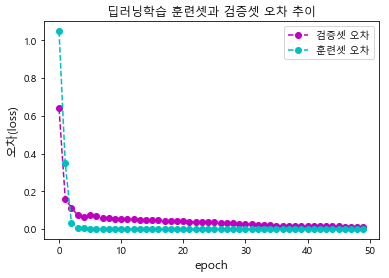

In [50]:
# 딥러닝학습 훈련셋과 검증셋 오차 추이
plt.plot(md_x_len, md_valid_loss, 'mo--', label = '검증셋 오차')
plt.plot(md_x_len, md_train_loss, 'co--', label = '훈련셋 오차')

plt.title('딥러닝학습 훈련셋과 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('오차(loss)', size = 12)
plt.legend()

# 마커설정 옵션 'co--', 'mo--'
# --> color = 'cyan', marker = 'o', linestyle = '--' 로 풀어서 코딩가능
# --> color = 'magenta', marker = 'o', linestyle = '--' 로 풀어서 코딩가능

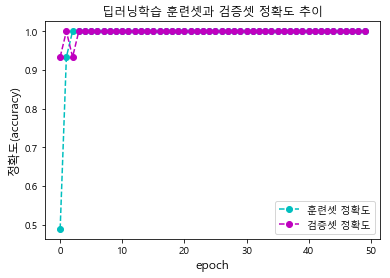

In [51]:
# 딥러닝학습 훈련셋과 검증셋 정확도 추이
plt.plot(md_x_len, md_train_acc, 'co--', label = '훈련셋 정확도')
plt.plot(md_x_len, md_valid_acc, 'mo--', label = '검증셋 정확도')

plt.title('딥러닝학습 훈련셋과 검증셋 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('정확도(accuracy)', size = 12)
plt.legend()

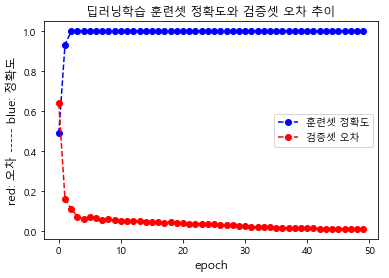

In [52]:
# 훈련셋 정확도와 검증셋 오차 추이
plt.plot(md_x_len, md_train_acc, color = 'blue', marker = 'o', 
         linestyle = '--', label = '훈련셋 정확도')
plt.plot(md_x_len, md_valid_loss, color = 'red', marker = 'o', 
         linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 훈련셋 정확도와 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션: color = 'red', marker = 'o', linestyle = '--'
# --> 'ro--'로 축약해서 설정가능함

### 모델 성능평가

#### md모델 훈련셋(train) 성능평가

In [53]:
# 훈련셋을 활용한 딥러닝모델의 성능평가 결과
md_train_perf = md.evaluate_generator(trainset, steps = 15)
md_train_perf

[7.390984507082976e-07, 1.0]

In [54]:
print('훈련셋 모델성능 종합:', [round(i, 3) for i in md_train_perf])
print(f'훈련셋 모델성능 오차(loss): {md_train_perf[0]:11.3f}')
print(f'훈련셋 모델성능 정확도(accuracy): {md_train_perf[1]:0.3f}')

훈련셋 모델성능 종합: [0.0, 1.0]
훈련셋 모델성능 오차(loss):       0.000
훈련셋 모델성능 정확도(accuracy): 1.000


#### md모델 테스트셋(test) 성능평가

In [55]:
# 테스트셋을 활용한 딥러닝모델의 성능평가 결과
md_test_perf = md.evaluate_generator(testset, steps = 5)
md_test_perf

[0.005507189275797941, 1.0]

In [56]:
print('테스트셋 모델성능 종합:', [round(i, 3) for i in md_test_perf])
print(f'테스트셋 모델성능 오차(loss): {md_test_perf[0]:11.3f}')
print(f'테스트셋 모델성능 정확도(accuracy): {md_test_perf[1]:0.3f}')

테스트셋 모델성능 종합: [0.006, 1.0]
테스트셋 모델성능 오차(loss):       0.006
테스트셋 모델성능 정확도(accuracy): 1.000


#### 훈련셋과 테스트셋 성능평가 비교

In [57]:
# 오차(loss) 비교
md_diff_loss = md_test_perf[0] - md_train_perf[0] 

# 정확도(accuracy) 비교
md_diff_acc = md_test_perf[1] - md_train_perf[1] 

print(f'[오차      (loss)] 훈련셋: {md_train_perf[0]:0.3f}, 테스트셋: {md_test_perf[0]:0.3f}, 차이: {md_diff_loss:6.3f}')
print(f'[정확도(accuracy)] 훈련셋: {md_train_perf[1]:0.3f}, 테스트셋: {md_test_perf[1]:0.3f}, 차이: {md_diff_acc:0.3f}')

[오차      (loss)] 훈련셋: 0.000, 테스트셋: 0.006, 차이:  0.006
[정확도(accuracy)] 훈련셋: 1.000, 테스트셋: 1.000, 차이: 0.000


# <font color = 'blue'>새로운 데이터 준비</font>
* 한 사람이 핸드라이팅으로 작성한 이미지 대신에
<br>여러 사람이 핸드라이팅으로 드로잉한 이미지에 대한 분석

### 이미지 파일 소싱

In [58]:
# 웹브라우저 라이브러리 이용해 해당 데이터셋 위치 확인
# import webbrowser
# webbrowser.open('https://https://github.com/tykimos/tykimos.github.io/blob/master/warehouse/2017-3-8-CNN_Data_Augmentation_hard_handwriting_shape.zip')

# - 다운받은 zip파일의 압축을 풀어 주피터노트북 작업경로내 ./datapic/hard_handwriting_shape 라는 폴더에 저장해 놓음

### 이미지 파일 저장폴더 확인

In [59]:
# 현재 작업경로내 분석대상 이미지파일 저장폴더 확인
os.listdir(path = './datapic/hard_handwriting_shape')

['test', 'train']

In [60]:
import os
 
rootDir = './datapic/hard_handwriting_shape'
for dirName, subdirList, fileList in os.walk(rootDir):
    print('Folder: %s' % dirName)
    for fname in fileList:
        print('\t%s' % fname)


Folder: ./datapic/hard_handwriting_shape
Folder: ./datapic/hard_handwriting_shape\test
Folder: ./datapic/hard_handwriting_shape\test\circle
	circle021.png
	circle022.png
	circle023.png
	circle024.png
	circle025.png
Folder: ./datapic/hard_handwriting_shape\test\rectangle
	rectangle021.png
	rectangle022.png
	rectangle023.png
	rectangle024.png
	rectangle025.png
Folder: ./datapic/hard_handwriting_shape\test\triangle
	triangle021.png
	triangle022.png
	triangle023.png
	triangle024.png
	triangle025.png
Folder: ./datapic/hard_handwriting_shape\train
Folder: ./datapic/hard_handwriting_shape\train\circle
	circle001.png
	circle002.png
	circle003.png
	circle004.png
	circle005.png
	circle006.png
	circle007.png
	circle008.png
	circle009.png
	circle010.png
	circle011.png
	circle012.png
	circle013.png
	circle014.png
	circle015.png
Folder: ./datapic/hard_handwriting_shape\train\rectangle
	rectangle001.png
	rectangle002.png
	rectangle003.png
	rectangle004.png
	rectangle005.png
	rectangle006.png
	rectang

### 이미지 파일 데이터셋 만들기

In [61]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 10

import numpy as np
np.random.seed(myseed)

In [62]:
# 이미지파일 데이터셋 제네레이션 모듈 준비
from keras.preprocessing.image import ImageDataGenerator

# 이미지파일 데이터셋 제네레이션 모듈 인스턴스 객체화
imgen = ImageDataGenerator(rescale = 1./255)

# - 하드디스크에 저장된 물리적인 이미지파일을 분석용 수치데이터셋으로 
#   변환/생성(제네레이션) 하는 기능을 별도의 객체로 만들어 냄

# - rescale = 1./255 옵션사용으로 딥러닝 연산에 적합한 스케일링 미리 실시해 로딩하는 것도 좋음
#             사용하지 않으면, 원본이미지의 픽셀별 색상농도 0~255 수치가 그대로 로딩되며, 
#             별도로 스케일링 전처리를 해주면 됨

In [63]:
# 이미지파일 데이터셋 생성객체 이용

# 훈련데이터셋 생성하기(제네레이션)
trainset = imgen.flow_from_directory(
    directory = './datapic/hard_handwriting_shape/train', 
    color_mode = 'grayscale',
    target_size = (24, 24), 
    batch_size = 3, 
    class_mode = 'categorical')

testset = imgen.flow_from_directory(
    directory = './datapic/hard_handwriting_shape/test', 
    color_mode = 'grayscale',
    target_size = (24, 24), 
    batch_size = 3, 
    class_mode = 'categorical')

# - directory: 해당 디렉토리 내에 분류예측대상 이미지파일을 레이블별로 폴더를 만들어서 저장해 놓아야 함
# - color_mode: 흑백이미지(grayscale), 컬러이미지(rgb)
# - target_size: 저장되어 있는 이미지 파일 로딩시 통일된 픽셀규격(가로, 세로)으로 로딩해줌
# - batch_size: 이미지파일을 메모리로 로딩시 몇 개씩 나누어서 처리할 것인지 설정
#               batsh_size = 3이므로 훈련용 이미지 45개 / 3배치 = 15개 epochs로 로딩됨
#               batsh_size = 3이므로 테스트용 이미지 15갸 / 3배치 = 5개 epochs로 로딩됨
# - class_mode: 분류예측용 레이블 숫자 생성
#               binary:이항분류, categorical:다항분류, sparse:1차원 정수 

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


# <font color = 'blue'>데이터 기본탐색</font>

### 훈련용 이미지파일 데이터셋

#### 이미지파일 로딩환경

In [64]:
print('이미지파일 로딩 경로:', trainset.directory)
print('이미지파일 로딩 갯수:', trainset.n)
print('이미지파일 로딩 갯수:', trainset.samples)
print('이미지파일 로딩 배치(batch) 크기:', trainset.batch_size)
print('이미지파일 로딩 에포크(epochs) 크기:', len(trainset))

이미지파일 로딩 경로: ./datapic/hard_handwriting_shape/train
이미지파일 로딩 갯수: 45
이미지파일 로딩 갯수: 45
이미지파일 로딩 배치(batch) 크기: 3
이미지파일 로딩 에포크(epochs) 크기: 15


In [65]:
# 이미지파일 로딩경로와 파일명
trainset.filenames

['circle\\circle001.png',
 'circle\\circle002.png',
 'circle\\circle003.png',
 'circle\\circle004.png',
 'circle\\circle005.png',
 'circle\\circle006.png',
 'circle\\circle007.png',
 'circle\\circle008.png',
 'circle\\circle009.png',
 'circle\\circle010.png',
 'circle\\circle011.png',
 'circle\\circle012.png',
 'circle\\circle013.png',
 'circle\\circle014.png',
 'circle\\circle015.png',
 'rectangle\\rectangle001.png',
 'rectangle\\rectangle002.png',
 'rectangle\\rectangle003.png',
 'rectangle\\rectangle004.png',
 'rectangle\\rectangle005.png',
 'rectangle\\rectangle006.png',
 'rectangle\\rectangle007.png',
 'rectangle\\rectangle008.png',
 'rectangle\\rectangle009.png',
 'rectangle\\rectangle010.png',
 'rectangle\\rectangle011.png',
 'rectangle\\rectangle012.png',
 'rectangle\\rectangle013.png',
 'rectangle\\rectangle014.png',
 'rectangle\\rectangle015.png',
 'triangle\\triangle001.png',
 'triangle\\triangle002.png',
 'triangle\\triangle003.png',
 'triangle\\triangle004.png',
 'triangle

#### 이미지파일 특성규격

In [66]:
print('이미지파일 색상채널 유형:', trainset.color_mode)
# - color_mode 옵션사용시 흑백:gryscale, 컬러:rgb

print('이미지파일 데이터 저장특성:', trainset.data_format)
# - channels_last: (가로픽셀수, 세로픽셀수, 색상채널)
# - channel_first: (색상채녈, 가로픽셀수, 세로픽셀수)

print('이미지파일 로딩규격:', trainset.target_size)

print('이미지파일 특성규격:', trainset.image_shape)
# - 가로픽셀수, 세로픽셀수, 색상유형

print('이미지파일 데이터 타입:', trainset.dtype)
# - 이미지마다의 각 픽셀별 색상농도수치가 실수형32비트로 로딩됨

print('이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법:', trainset.interpolation)
# - nearest: 부드럽게 처리, none: 일반 직선모양

이미지파일 색상채널 유형: grayscale
이미지파일 데이터 저장특성: channels_last
이미지파일 로딩규격: (24, 24)
이미지파일 특성규격: (24, 24, 1)
이미지파일 데이터 타입: float32
이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법: nearest


#### 이미지파일 클래스 레이블

In [67]:
print('이미지파일 클래스 유형:', trainset.class_mode)
# - binary:이항분류, categorical:다항분류, sparse:1차원 정수

print('이미지파일 클래스 유형개수:', trainset.num_classes)

print('\n이미지파일 클래스별 레이블과 번호:\n', trainset.class_indices)
# - 하드디스크에 저장되어 있는 폴더명&순서를 그대로 가져와서 사용함

print('\n이미지파일 마다 부여된 클래스 번호:\n', trainset.classes)

이미지파일 클래스 유형: categorical
이미지파일 클래스 유형개수: 3

이미지파일 클래스별 레이블과 번호:
 {'circle': 0, 'rectangle': 1, 'triangle': 2}

이미지파일 마다 부여된 클래스 번호:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


### 테스트용 이미지파일 데이터셋

#### 이미지파일 로딩환경

In [68]:
print('이미지파일 로딩 경로:', testset.directory)
print('이미지파일 로딩 갯수:', testset.n)
print('이미지파일 로딩 갯수:', testset.samples)
print('이미지파일 로딩 배치(batch) 크기:', testset.batch_size)
print('이미지파일 로딩 에포크(epochs) 크기:', len(testset))

이미지파일 로딩 경로: ./datapic/hard_handwriting_shape/test
이미지파일 로딩 갯수: 15
이미지파일 로딩 갯수: 15
이미지파일 로딩 배치(batch) 크기: 3
이미지파일 로딩 에포크(epochs) 크기: 5


In [69]:
# 이미지파일 로딩경로와 파일명
testset.filenames

['circle\\circle021.png',
 'circle\\circle022.png',
 'circle\\circle023.png',
 'circle\\circle024.png',
 'circle\\circle025.png',
 'rectangle\\rectangle021.png',
 'rectangle\\rectangle022.png',
 'rectangle\\rectangle023.png',
 'rectangle\\rectangle024.png',
 'rectangle\\rectangle025.png',
 'triangle\\triangle021.png',
 'triangle\\triangle022.png',
 'triangle\\triangle023.png',
 'triangle\\triangle024.png',
 'triangle\\triangle025.png']

#### 이미지파일 특성규격

In [70]:
print('이미지파일 색상채널 유형:', testset.color_mode)
# - color_mode 옵션사용시 흑백:gryscale, 컬러:rgb

print('이미지파일 데이터 저장특성:', testset.data_format)
# - channels_last: (가로픽셀수, 세로픽셀수, 색상채널)
# - channel_first: (색상채녈, 가로픽셀수, 세로픽셀수)

print('이미지파일 로딩규격:', testset.target_size)

print('이미지파일 특성규격:', testset.image_shape)
# - 가로픽셀수, 세로픽셀수, 색상유형

print('이미지파일 데이터 타입:', testset.dtype)
# - 이미지마다의 각 픽셀별 색상농도수치가 실수형32비트로 로딩됨

print('이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법:', testset.interpolation)
# - nearest: 부드럽게 처리, none: 일반 직선모양

이미지파일 색상채널 유형: grayscale
이미지파일 데이터 저장특성: channels_last
이미지파일 로딩규격: (24, 24)
이미지파일 특성규격: (24, 24, 1)
이미지파일 데이터 타입: float32
이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법: nearest


#### 이미지파일 클래스 레이블

In [71]:
print('이미지파일 클래스 유형:', testset.class_mode)
# - binary:이항분류, categorical:다항분류, sparse:1차원 정수

print('이미지파일 클래스 유형개수:', testset.num_classes)

print('\n이미지파일 클레스별 레이블과 번호:\n', testset.class_indices)
# - 하드디스크에 저장되어 있는 폴더명&순서를 그대로 가져와서 사용함

print('\n이미지파일 마다 부여된 클래스 번호:\n', testset.classes)

이미지파일 클래스 유형: categorical
이미지파일 클래스 유형개수: 3

이미지파일 클레스별 레이블과 번호:
 {'circle': 0, 'rectangle': 1, 'triangle': 2}

이미지파일 마다 부여된 클래스 번호:
 [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


# <font color = 'blue'>딥러닝 모델링</font>

### 딥러닝 라이브러리 로딩

In [72]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# - Dense: 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌
# - Dropout: 은닉층에 배치된 노두 중 일부를 임의로 비활성화 시킴
# - Flatten: 컨볼루션층이나 맥스풀링의 2차원(가로X세로) 배열을 1차원으로 바꾸어 주는 기능
# - Conv2D: 분석대상 이미지의 세부영역별 특징을 마스크 필터를 적용해 추출하는 기능
# - MaxPooling2D: 분석대상 이미지의 세부영역별 대표특징값을 추출하는 기능

### 딥러닝 학습계층 설정

In [73]:
# 입력층-컨볼루션층-컨볼루션층-맥스풀링층--플래튼-은닉층-출력층
md = Sequential()

# 컨볼루션층: 입력이미지크기
md.add(Conv2D(32, kernel_size = (3, 3), input_shape = (24, 24, 1), activation = 'relu'))
md.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))

md.add(MaxPooling2D(pool_size = (2, 2)))

md.add(Flatten())

md.add(Dense(128, activation = 'relu'))
md.add(Dense(3, activation = 'softmax'))

md.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 838,531
Trainable params: 838,531
Non-trainable params: 0
_________________________________________________________________


### 딥러닝 학습방법 설정

In [74]:
# 준비된 학습계층의 학습방법 설정
md.compile(loss = 'categorical_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])
# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

### 딥러닝 모델에 데이터 피팅

In [75]:
# 딥러닝 모델 최적화 훈련진행
md_hist = md.fit_generator(
    trainset,  
    epochs = 50, 
    steps_per_epoch = 15, 
    validation_data = testset,
    validation_steps = 5,
    verbose = 1, 
    callbacks = [cp, es])

Epoch 1/50
15/15 [==============================] - 1s 59ms/step - loss: 1.0470 - acc: 0.5556 - val_loss: 1.2344 - val_acc: 0.3333

Epoch 00001: val_loss did not improve from 0.01178
Epoch 2/50
15/15 [==============================] - 0s 24ms/step - loss: 0.3465 - acc: 0.8889 - val_loss: 2.4926 - val_acc: 0.3333

Epoch 00002: val_loss did not improve from 0.01178
Epoch 3/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0547 - acc: 0.9778 - val_loss: 3.4701 - val_acc: 0.4000

Epoch 00003: val_loss did not improve from 0.01178
Epoch 4/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.9171 - val_acc: 0.4000

Epoch 00004: val_loss did not improve from 0.01178
Epoch 5/50
15/15 [==============================] - 0s 25ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 4.2642 - val_acc: 0.4000

Epoch 00005: val_loss did not improve from 0.01178
Epoch 6/50
15/15 [==============================] - 0s 25ms/step - loss: 5.7338e-04 -

# <font color = 'blue'>딥러닝 모델 성능평가</font>

### 딥러닝 학습모델 성능평가 히스토리

In [76]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 확보

md_train_loss = md_hist.history['loss'] # 훈련셋 오차
md_train_acc = md_hist.history['acc'] # 훈련셋 정확도
md_valid_loss = md_hist.history['val_loss'] # 검증셋 오차
md_valid_acc = md_hist.history['val_acc'] # 검증셋 정확도

In [77]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 객체형식과 규모
print(type(md_train_loss), len(md_train_loss))
print(type(md_train_acc), len(md_train_acc))
print(type(md_valid_loss), len(md_valid_loss))
print(type(md_valid_acc), len(md_valid_acc))

<class 'list'> 11
<class 'list'> 11
<class 'list'> 11
<class 'list'> 11


In [78]:
print('훈련셋   오차추이:', [round(i, 3) for i in md_train_loss])
print('테스트셋 오차추이:', [round(i, 3) for i in md_valid_loss])

print()

print('훈련셋   정확도추이:', [round(i, 3) for i in md_train_acc])
print('테스트셋 정확도추이:', [round(i, 3) for i in md_valid_acc])

훈련셋   오차추이: [1.047, 0.347, 0.055, 0.004, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0]
테스트셋 오차추이: [1.234, 2.493, 3.47, 3.917, 4.264, 4.53, 4.813, 4.937, 5.031, 5.113, 5.179]

훈련셋   정확도추이: [0.556, 0.889, 0.978, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
테스트셋 정확도추이: [0.333, 0.333, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]


### 딥러닝 학습모델 성능평가 그래프

#### md모델 훈련셋과 검증셋 성능비교

In [79]:
# x축 설정
# - epochs에 의해서 딥러닝 학습모델이 수십~수백개 만들어저 진행됨에 따라
#   학습오차, 학습정확도, 검증오차, 검증정확도가 모두 수십~수백개 값이 생성됨
# - 그런데, callbacks = [cp, es] 파라미터 설정으로 
#   개선된 베스트모델&과적합방지 학습모델에 대해서만 제한적으로  
#   학습오차, 학습정확도, 검증오차, 검증정확도가 기록됨  
#   [cp] 학습모델별 성능평가파일 생성시 
#        이전파일보다 성능이 개선된 베스트모델을 저장옵션
#   [es] 딥러닝 과적합방지용 조기종료 옵션 
md_x_len = np.arange(len(md_train_loss))
md_x_len

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

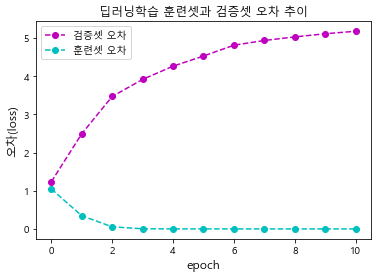

In [80]:
# 딥러닝학습 훈련셋과 검증셋 오차 추이
plt.plot(md_x_len, md_valid_loss, 'mo--', label = '검증셋 오차')
plt.plot(md_x_len, md_train_loss, 'co--', label = '훈련셋 오차')

plt.title('딥러닝학습 훈련셋과 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('오차(loss)', size = 12)
plt.legend()

# 마커설정 옵션 'co--', 'mo--'
# --> color = 'cyan', marker = 'o', linestyle = '--' 로 풀어서 코딩가능
# --> color = 'magenta', marker = 'o', linestyle = '--' 로 풀어서 코딩가능

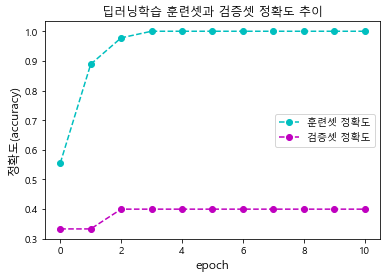

In [81]:
# 딥러닝학습 훈련셋과 검증셋 정확도 추이
plt.plot(md_x_len, md_train_acc, 'co--', label = '훈련셋 정확도')
plt.plot(md_x_len, md_valid_acc, 'mo--', label = '검증셋 정확도')

plt.title('딥러닝학습 훈련셋과 검증셋 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('정확도(accuracy)', size = 12)
plt.legend()

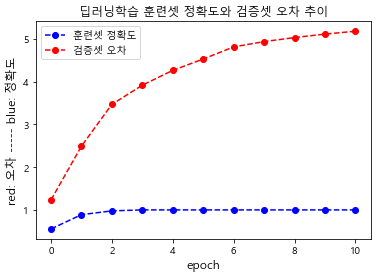

In [82]:
# 훈련셋 정확도와 검증셋 오차 추이
plt.plot(md_x_len, md_train_acc, color = 'blue', marker = 'o', 
         linestyle = '--', label = '훈련셋 정확도')
plt.plot(md_x_len, md_valid_loss, color = 'red', marker = 'o', 
         linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 훈련셋 정확도와 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션: color = 'red', marker = 'o', linestyle = '--'
# --> 'ro--'로 축약해서 설정가능함

### 모델 성능평가

#### md모델 훈련셋(train) 성능평가

In [83]:
# 훈련셋을 활용한 딥러닝모델의 성능평가 결과
md_train_perf = md.evaluate_generator(trainset, steps = 15)
md_train_perf

[0.000117928510492978, 1.0]

In [84]:
print('훈련셋 모델성능 종합:', [round(i, 3) for i in md_train_perf])
print(f'훈련셋 모델성능 오차(loss): {md_train_perf[0]:11.3f}')
print(f'훈련셋 모델성능 정확도(accuracy): {md_train_perf[1]:0.3f}')

훈련셋 모델성능 종합: [0.0, 1.0]
훈련셋 모델성능 오차(loss):       0.000
훈련셋 모델성능 정확도(accuracy): 1.000


#### md모델 테스트셋(test) 성능평가

In [85]:
# 테스트셋을 활용한 딥러닝모델의 성능평가 결과
md_test_perf = md.evaluate_generator(testset, steps = 5)
md_test_perf

[3.5441090196371077, 0.4666666746139526]

In [86]:
print('테스트셋 모델성능 종합:', [round(i, 3) for i in md_test_perf])
print(f'테스트셋 모델성능 오차(loss): {md_test_perf[0]:11.3f}')
print(f'테스트셋 모델성능 정확도(accuracy): {md_test_perf[1]:0.3f}')

테스트셋 모델성능 종합: [3.544, 0.467]
테스트셋 모델성능 오차(loss):       3.544
테스트셋 모델성능 정확도(accuracy): 0.467


#### 훈련셋과 테스트셋 성능평가 비교

In [87]:
# 오차(loss) 비교
md_diff_loss = md_test_perf[0] - md_train_perf[0] 

# 정확도(accuracy) 비교
md_diff_acc = md_test_perf[1] - md_train_perf[1] 

print(f'[오차      (loss)] 훈련셋: {md_train_perf[0]:0.3f}, 테스트셋: {md_test_perf[0]:0.3f}, 차이: {md_diff_loss:6.3f}')
print(f'[정확도(accuracy)] 훈련셋: {md_train_perf[1]:0.3f}, 테스트셋: {md_test_perf[1]:0.3f}, 차이: {md_diff_acc:0.3f}')

[오차      (loss)] 훈련셋: 0.000, 테스트셋: 3.544, 차이:  3.544
[정확도(accuracy)] 훈련셋: 1.000, 테스트셋: 0.467, 차이: -0.533


# <font color = 'blue'>데이터 증식(증강;부풀리기: Data Augmentation)</font>

### 이미지데이터 증식 필요성
* 분석대상 이미지에 임의로 변형을 가하는 작업
* 주어진 데이터 갯수에 비해 더 많은 이미지를 대상으로 훈련을 실시해 
<br>과적합 (overfitting)을 방지하고, 새로운 이미지에 대한 일반화 가능성을 높임

### 이미지데이터 증식유형

#### rotation_range = 90
* 지정된 각도 범위내에서 임의로 원본이미지를 회전시킴
* 단위는 도이며, 정수형으로 지정함
* 90로 지정하면 0도에서 90도 사이에 임의의 각도로 회전시킴
<img src = './../../images/aug_01_rotation.png'>

#### width_shift_range = 0.1
* 지정된 수평방향 이동 범위내에서 임의로 원본이미지를 이동시킴
* 수치는 전체 넓이의 비율(실수)로 나타냄
* 0.1로 지정하면, 전체 넓이가 100일 경우 10픽셀 내외로 좌우 이동시킴
<img src = './../../images/aug_02_wd_shift.png'>

#### height_shift_range = 0.1
* 지정된 수직방향 이동 범위내에서 임의로 원본이미지를 이동킴
* 수치는 전체 높이의 비율(실수)로 나타냄
* 0.1로 지정하면, 전체 높이가 100일 경우 10픽셀 내외로 상하 이동시킴
<img src = './../../images/aug_03_ht_shift.png'>

#### shear_range = 0.5
* 밀림 강도 범위내에서 임의로 원본이미지를 변형시킴
* 수치는 시계반대방향으로 밀림 강도를 라디안으로 나타냄
* 0.5로 지정하면, 0.5 라이안내외로 시계반대방향으로 변형시킴
<img src = './../../images/aug_04_shear.png'>

#### zoom_range = 0.3
* 지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소함
* '1-수치' ~ '1+수치' 사이 범위로 확대/축소를 실시함
* 0.3으로 지정하면, 0.7배에서 1.3배 크기 변화시킴
<img src = './../../images/aug_05_zoom.png'>

#### horizontal_flip = True
수평방향으로 뒤집기를 실시함
<img src = './../../images/aug_06_horiz.png'>

#### vertical_flip = True
수직방향으로 뒤집기를 실시함
<img src = './../../images/aug_07_vert.png'>

### 이미지데이터 증식방법
* 이미지파일 1개를 로딩해 다양한 방식으로 증식되는 예시 확인

In [88]:
# 이미지파일 단독 로딩용 라이브러리 준비
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [89]:
# 예시 이미지 1개 로딩
img = load_img('./datapic/hard_handwriting_shape/train/triangle/triangle001.png')
img

In [90]:
# 이미지파일 데이터 내용&구조 확인
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [91]:
# 이미지파일 증식변환작업 저장폴더명 설정
import os

md_dir = './datapic/preview'
if not os.path.exists(md_dir):
    os.mkdir(md_dir)

In [92]:
# 이미지 변형증식용 제네레이터 생성
imgen_aug = ImageDataGenerator(rescale = 1./255, 
                               rotation_range = 15,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.5,
                               zoom_range = [0.8, 2.0],
                               horizontal_flip = True,
                               vertical_flip = True,
                               fill_mode = 'nearest')

In [94]:
# for 구문을 활용한 이미지파일 증식시키기    
i = 0

for batch in imgen_aug.flow(x, 
                            batch_size = 1, 
                            save_to_dir = './datapic/preview', 
                            save_prefix = 'tri', 
                            save_format = 'png'):
    i += 1

    # 30개 정도까지만 샘플로 증식시킴
    if i > 30: 
        break

In [ ]:
# 증식된 이미지 파일 확인
os.listdir(path = './datapic/preview')

### 이미지 증식방식을 이용한 딥러닝 피팅

In [96]:
# 이미지파일 데이터셋 제네레이션 모듈 인스턴스 객체화
train_gen = ImageDataGenerator(rescale=1./255, 
                               rotation_range = 10,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               shear_range = 0.7,
                               zoom_range=[0.9, 2.2],
                               horizontal_flip = True,
                               vertical_flip = True,
                               fill_mode = 'nearest')

# 훈련데이터셋 생성하기(제네레이션)
trainset = train_gen.flow_from_directory(
    directory = './datapic/hard_handwriting_shape/train', 
    color_mode = 'grayscale',
    target_size = (24, 24), 
    batch_size = 3, 
    class_mode = 'categorical')

# - directory: 해당 디렉토리 내에 분류예측대상 이미지파일을 레이블별로 폴더를 만들어서 저장해 놓아야 함
# - color_mode: 흑백이미지(grayscale), 컬러이미지(rgb)
# - target_size: 저장되어 있는 이미지 파일 로딩시 통일된 픽셀규격(가로, 세로)으로 로딩해줌
# - batch_size: 이미지파일을 메모리로 로딩시 몇 개씩 나누어서 처리할 것인지 설정
#               batsh_size = 3이므로 훈련용 이미지 45개 / 3배치 = 15개 epochs로 로딩됨
#               batsh_size = 3이므로 테스트용 이미지 15갸 / 3배치 = 5개 epochs로 로딩됨
# - class_mode: 분류예측용 레이블 숫자 생성
#               binary:이항분류, categorical:다항분류, sparse:1차원 정수 

# - 하드디스크에 저장된 물리적인 이미지파일을 분석용 수치데이터셋으로 
#   변환/생성(제네레이션) 하는 기능을 별도의 객체로 만들어 냄

Found 45 images belonging to 3 classes.


In [97]:
# 이미지파일 데이터셋 제네레이션 모듈 인스턴스 객체화
test_gen = ImageDataGenerator(rescale=1./255)

# 테스트데이터셋 생성하기(제네레이션)
testset = test_gen.flow_from_directory(
    directory = './datapic/hard_handwriting_shape/test', 
    color_mode = 'grayscale',
    target_size = (24, 24), 
    batch_size = 3, 
    class_mode = 'categorical')

Found 15 images belonging to 3 classes.


# <font color = 'blue'>데이터 기본탐색</font>

### 훈련용 이미지파일 데이터셋

#### 이미지파일 로딩환경

In [98]:
print('이미지파일 로딩 경로:', trainset.directory)
print('이미지파일 로딩 갯수:', trainset.n)
print('이미지파일 로딩 갯수:', trainset.samples)
print('이미지파일 로딩 배치(batch) 크기:', trainset.batch_size)
print('이미지파일 로딩 에포크(epochs) 크기:', len(trainset))

이미지파일 로딩 경로: ./datapic/hard_handwriting_shape/train
이미지파일 로딩 갯수: 45
이미지파일 로딩 갯수: 45
이미지파일 로딩 배치(batch) 크기: 3
이미지파일 로딩 에포크(epochs) 크기: 15


In [99]:
# 이미지파일 로딩경로와 파일명
trainset.filenames

['circle\\circle001.png',
 'circle\\circle002.png',
 'circle\\circle003.png',
 'circle\\circle004.png',
 'circle\\circle005.png',
 'circle\\circle006.png',
 'circle\\circle007.png',
 'circle\\circle008.png',
 'circle\\circle009.png',
 'circle\\circle010.png',
 'circle\\circle011.png',
 'circle\\circle012.png',
 'circle\\circle013.png',
 'circle\\circle014.png',
 'circle\\circle015.png',
 'rectangle\\rectangle001.png',
 'rectangle\\rectangle002.png',
 'rectangle\\rectangle003.png',
 'rectangle\\rectangle004.png',
 'rectangle\\rectangle005.png',
 'rectangle\\rectangle006.png',
 'rectangle\\rectangle007.png',
 'rectangle\\rectangle008.png',
 'rectangle\\rectangle009.png',
 'rectangle\\rectangle010.png',
 'rectangle\\rectangle011.png',
 'rectangle\\rectangle012.png',
 'rectangle\\rectangle013.png',
 'rectangle\\rectangle014.png',
 'rectangle\\rectangle015.png',
 'triangle\\triangle001.png',
 'triangle\\triangle002.png',
 'triangle\\triangle003.png',
 'triangle\\triangle004.png',
 'triangle

#### 이미지파일 특성규격

In [100]:
print('이미지파일 색상채널 유형:', trainset.color_mode)
# - color_mode 옵션사용시 흑백:gryscale, 컬러:rgb

print('이미지파일 데이터 저장특성:', trainset.data_format)
# - channels_last: (가로픽셀수, 세로픽셀수, 색상채널)
# - channel_first: (색상채녈, 가로픽셀수, 세로픽셀수)

print('이미지파일 로딩규격:', trainset.target_size)

print('이미지파일 특성규격:', trainset.image_shape)
# - 가로픽셀수, 세로픽셀수, 색상유형

print('이미지파일 데이터 타입:', trainset.dtype)
# - 이미지마다의 각 픽셀별 색상농도수치가 실수형32비트로 로딩됨

print('이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법:', trainset.interpolation)
# - nearest: 부드럽게 처리, none: 일반 직선모양

이미지파일 색상채널 유형: grayscale
이미지파일 데이터 저장특성: channels_last
이미지파일 로딩규격: (24, 24)
이미지파일 특성규격: (24, 24, 1)
이미지파일 데이터 타입: float32
이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법: nearest


#### 이미지파일 클래스 레이블

In [101]:
print('이미지파일 클래스 유형:', trainset.class_mode)
# - binary:이항분류, categorical:다항분류, sparse:1차원 정수

print('이미지파일 클래스 유형개수:', trainset.num_classes)

print('\n이미지파일 클래스별 레이블과 번호:\n', trainset.class_indices)
# - 하드디스크에 저장되어 있는 폴더명&순서를 그대로 가져와서 사용함

print('\n이미지파일 마다 부여된 클래스 번호:\n', trainset.classes)

이미지파일 클래스 유형: categorical
이미지파일 클래스 유형개수: 3

이미지파일 클래스별 레이블과 번호:
 {'circle': 0, 'rectangle': 1, 'triangle': 2}

이미지파일 마다 부여된 클래스 번호:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


### 테스트용 이미지파일 데이터셋

#### 이미지파일 로딩환경

In [102]:
print('이미지파일 로딩 경로:', testset.directory)
print('이미지파일 로딩 갯수:', testset.n)
print('이미지파일 로딩 갯수:', testset.samples)
print('이미지파일 로딩 배치(batch) 크기:', testset.batch_size)
print('이미지파일 로딩 에포크(epochs) 크기:', len(testset))

이미지파일 로딩 경로: ./datapic/hard_handwriting_shape/test
이미지파일 로딩 갯수: 15
이미지파일 로딩 갯수: 15
이미지파일 로딩 배치(batch) 크기: 3
이미지파일 로딩 에포크(epochs) 크기: 5


In [103]:
# 이미지파일 로딩경로와 파일명
testset.filenames

['circle\\circle021.png',
 'circle\\circle022.png',
 'circle\\circle023.png',
 'circle\\circle024.png',
 'circle\\circle025.png',
 'rectangle\\rectangle021.png',
 'rectangle\\rectangle022.png',
 'rectangle\\rectangle023.png',
 'rectangle\\rectangle024.png',
 'rectangle\\rectangle025.png',
 'triangle\\triangle021.png',
 'triangle\\triangle022.png',
 'triangle\\triangle023.png',
 'triangle\\triangle024.png',
 'triangle\\triangle025.png']

#### 이미지파일 특성규격

In [104]:
print('이미지파일 색상채널 유형:', testset.color_mode)
# - color_mode 옵션사용시 흑백:gryscale, 컬러:rgb

print('이미지파일 데이터 저장특성:', testset.data_format)
# - channels_last: (가로픽셀수, 세로픽셀수, 색상채널)
# - channel_first: (색상채녈, 가로픽셀수, 세로픽셀수)

print('이미지파일 로딩규격:', testset.target_size)

print('이미지파일 특성규격:', testset.image_shape)
# - 가로픽셀수, 세로픽셀수, 색상유형

print('이미지파일 데이터 타입:', testset.dtype)
# - 이미지마다의 각 픽셀별 색상농도수치가 실수형32비트로 로딩됨

print('이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법:', testset.interpolation)
# - nearest: 부드럽게 처리, none: 일반 직선모양

이미지파일 색상채널 유형: grayscale
이미지파일 데이터 저장특성: channels_last
이미지파일 로딩규격: (24, 24)
이미지파일 특성규격: (24, 24, 1)
이미지파일 데이터 타입: float32
이미지파일 픽셀과 픽셀사이, 점과 점사이 연결방법: nearest


#### 이미지파일 클래스 레이블

In [105]:
print('이미지파일 클래스 유형:', testset.class_mode)
# - binary:이항분류, categorical:다항분류, sparse:1차원 정수

print('이미지파일 클래스 유형개수:', testset.num_classes)

print('\n이미지파일 클레스별 레이블과 번호:\n', testset.class_indices)
# - 하드디스크에 저장되어 있는 폴더명&순서를 그대로 가져와서 사용함

print('\n이미지파일 마다 부여된 클래스 번호:\n', testset.classes)

이미지파일 클래스 유형: categorical
이미지파일 클래스 유형개수: 3

이미지파일 클레스별 레이블과 번호:
 {'circle': 0, 'rectangle': 1, 'triangle': 2}

이미지파일 마다 부여된 클래스 번호:
 [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


# <font color = 'blue'>딥러닝 모델링</font>

### 딥러닝 라이브러리 로딩

In [106]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# - Dense: 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌
# - Dropout: 은닉층에 배치된 노두 중 일부를 임의로 비활성화 시킴
# - Flatten: 컨볼루션층이나 맥스풀링의 2차원(가로X세로) 배열을 1차원으로 바꾸어 주는 기능
# - Conv2D: 분석대상 이미지의 세부영역별 특징을 마스크 필터를 적용해 추출하는 기능
# - MaxPooling2D: 분석대상 이미지의 세부영역별 대표특징값을 추출하는 기능

### 딥러닝 학습계층 설정

In [107]:
# 입력층-컨볼루션층-컨볼루션층-맥스풀링층--플래튼-은닉층-출력층
md = Sequential()

# 컨볼루션층: 입력이미지크기
md.add(Conv2D(32, kernel_size = (3, 3), input_shape = (24, 24, 1), activation = 'relu'))
md.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))

md.add(MaxPooling2D(pool_size = (2, 2)))

md.add(Flatten())

md.add(Dense(128, activation = 'relu'))
md.add(Dense(3, activation = 'softmax'))

md.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 387       
Total params: 838,531
Trainable params: 838,531
Non-trainable params: 0
_________________________________________________________________


### 딥러닝 학습방법 설정

In [108]:
# 준비된 학습계층의 학습방법 설정
md.compile(loss = 'categorical_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])
# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

### 딥러닝 모델에 데이터 피팅

In [109]:
# 딥러닝 모델 최적화 훈련진행
md_hist = md.fit_generator(
    trainset,  
    epochs = 50, 
    steps_per_epoch = 15 * 100, 
    validation_data = testset,
    validation_steps = 5,
    verbose = 1, 
    callbacks = [cp, es])

Epoch 1/50
1500/1500 [==============================] - 32s 22ms/step - loss: 0.2017 - acc: 0.9196 - val_loss: 1.2526 - val_acc: 0.8000

Epoch 00001: val_loss did not improve from 0.01178
Epoch 2/50
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0307 - acc: 0.9909 - val_loss: 1.6748 - val_acc: 0.8000loss: 0.0294 - ac - ETA: 1s - loss:

Epoch 00002: val_loss did not improve from 0.01178
Epoch 3/50
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0187 - acc: 0.9944 - val_loss: 1.9187 - val_acc: 0.7333

Epoch 00003: val_loss did not improve from 0.01178
Epoch 4/50
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0218 - acc: 0.9931 - val_loss: 2.0288 - val_acc: 0.8000

Epoch 00004: val_loss did not improve from 0.01178
Epoch 5/50
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0205 - acc: 0.9931 - val_loss: 2.1265 - val_acc: 0.8000

Epoch 00005: val_loss did not improve from 0.01178
Epoch 6/50
1500/1500 [===

# <font color = 'blue'>딥러닝 모델 성능평가</font>

### 딥러닝 학습모델 성능평가 히스토리

In [110]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 확보

md_train_loss = md_hist.history['loss'] # 훈련셋 오차
md_train_acc = md_hist.history['acc'] # 훈련셋 정확도
md_valid_loss = md_hist.history['val_loss'] # 검증셋 오차
md_valid_acc = md_hist.history['val_acc'] # 검증셋 정확도

In [111]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 객체형식과 규모
print(type(md_train_loss), len(md_train_loss))
print(type(md_train_acc), len(md_train_acc))
print(type(md_valid_loss), len(md_valid_loss))
print(type(md_valid_acc), len(md_valid_acc))

<class 'list'> 11
<class 'list'> 11
<class 'list'> 11
<class 'list'> 11


In [112]:
print('훈련셋   오차추이:', [round(i, 3) for i in md_train_loss])
print('테스트셋 오차추이:', [round(i, 3) for i in md_valid_loss])

print()

print('훈련셋   정확도추이:', [round(i, 3) for i in md_train_acc])
print('테스트셋 정확도추이:', [round(i, 3) for i in md_valid_acc])

훈련셋   오차추이: [0.202, 0.031, 0.019, 0.022, 0.021, 0.018, 0.006, 0.017, 0.012, 0.012, 0.01]
테스트셋 오차추이: [1.253, 1.675, 1.919, 2.029, 2.127, 1.847, 2.567, 2.37, 2.178, 2.531, 3.188]

훈련셋   정확도추이: [0.92, 0.991, 0.994, 0.993, 0.993, 0.994, 0.998, 0.995, 0.997, 0.997, 0.998]
테스트셋 정확도추이: [0.8, 0.8, 0.733, 0.8, 0.8, 0.733, 0.8, 0.8, 0.733, 0.733, 0.733]


### 딥러닝 학습모델 성능평가 그래프

#### md모델 훈련셋과 검증셋 성능비교

In [113]:
# x축 설정
# - epochs에 의해서 딥러닝 학습모델이 수십~수백개 만들어저 진행됨에 따라
#   학습오차, 학습정확도, 검증오차, 검증정확도가 모두 수십~수백개 값이 생성됨
# - 그런데, callbacks = [cp, es] 파라미터 설정으로 
#   개선된 베스트모델&과적합방지 학습모델에 대해서만 제한적으로  
#   학습오차, 학습정확도, 검증오차, 검증정확도가 기록됨  
#   [cp] 학습모델별 성능평가파일 생성시 
#        이전파일보다 성능이 개선된 베스트모델을 저장옵션
#   [es] 딥러닝 과적합방지용 조기종료 옵션 
md_x_len = np.arange(len(md_train_loss))
md_x_len

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

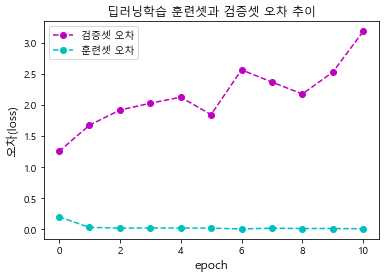

In [114]:
# 딥러닝학습 훈련셋과 검증셋 오차 추이
plt.plot(md_x_len, md_valid_loss, 'mo--', label = '검증셋 오차')
plt.plot(md_x_len, md_train_loss, 'co--', label = '훈련셋 오차')

plt.title('딥러닝학습 훈련셋과 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('오차(loss)', size = 12)
plt.legend()

# 마커설정 옵션 'co--', 'mo--'
# --> color = 'cyan', marker = 'o', linestyle = '--' 로 풀어서 코딩가능
# --> color = 'magenta', marker = 'o', linestyle = '--' 로 풀어서 코딩가능

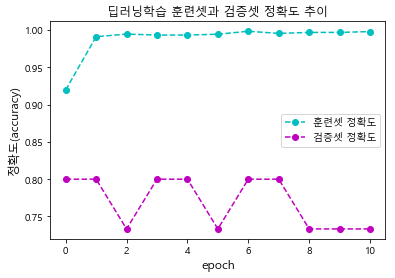

In [115]:
# 딥러닝학습 훈련셋과 검증셋 정확도 추이
plt.plot(md_x_len, md_train_acc, 'co--', label = '훈련셋 정확도')
plt.plot(md_x_len, md_valid_acc, 'mo--', label = '검증셋 정확도')

plt.title('딥러닝학습 훈련셋과 검증셋 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('정확도(accuracy)', size = 12)
plt.legend()

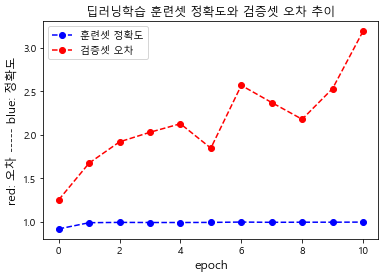

In [116]:
# 훈련셋 정확도와 검증셋 오차 추이
plt.plot(md_x_len, md_train_acc, color = 'blue', marker = 'o', 
         linestyle = '--', label = '훈련셋 정확도')
plt.plot(md_x_len, md_valid_loss, color = 'red', marker = 'o', 
         linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 훈련셋 정확도와 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션: color = 'red', marker = 'o', linestyle = '--'
# --> 'ro--'로 축약해서 설정가능함

### 모델 성능평가

#### md모델 훈련셋(train) 성능평가

In [117]:
# 훈련셋을 활용한 딥러닝모델의 성능평가 결과
md_train_perf = md.evaluate_generator(trainset, steps = 15)
md_train_perf

[0.009919330595105672, 1.0]

In [118]:
print('훈련셋 모델성능 종합:', [round(i, 3) for i in md_train_perf])
print(f'훈련셋 모델성능 오차(loss): {md_train_perf[0]:11.3f}')
print(f'훈련셋 모델성능 정확도(accuracy): {md_train_perf[1]:0.3f}')

훈련셋 모델성능 종합: [0.01, 1.0]
훈련셋 모델성능 오차(loss):       0.010
훈련셋 모델성능 정확도(accuracy): 1.000


#### md모델 테스트셋(test) 성능평가

In [119]:
# 테스트셋을 활용한 딥러닝모델의 성능평가 결과
md_test_perf = md.evaluate_generator(testset, steps = 5)
md_test_perf

[4.242476963996888, 0.6666666805744171]

In [120]:
print('테스트셋 모델성능 종합:', [round(i, 3) for i in md_test_perf])
print(f'테스트셋 모델성능 오차(loss): {md_test_perf[0]:11.3f}')
print(f'테스트셋 모델성능 정확도(accuracy): {md_test_perf[1]:0.3f}')

테스트셋 모델성능 종합: [4.242, 0.667]
테스트셋 모델성능 오차(loss):       4.242
테스트셋 모델성능 정확도(accuracy): 0.667


#### 훈련셋과 테스트셋 성능평가 비교

In [121]:
# 오차(loss) 비교
md_diff_loss = md_test_perf[0] - md_train_perf[0] 

# 정확도(accuracy) 비교
md_diff_acc = md_test_perf[1] - md_train_perf[1] 

print(f'[오차      (loss)] 훈련셋: {md_train_perf[0]:0.3f}, 테스트셋: {md_test_perf[0]:0.3f}, 차이: {md_diff_loss:6.3f}')
print(f'[정확도(accuracy)] 훈련셋: {md_train_perf[1]:0.3f}, 테스트셋: {md_test_perf[1]:0.3f}, 차이: {md_diff_acc:0.3f}')

[오차      (loss)] 훈련셋: 0.010, 테스트셋: 4.242, 차이:  4.233
[정확도(accuracy)] 훈련셋: 1.000, 테스트셋: 0.667, 차이: -0.333


# End of Source